<a href="https://colab.research.google.com/github/Euan-J-Austin/Analytics_and_Intelligence/blob/main/GaussianChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Card Customer Behaviour

#1 Prepare data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_csv("/content/CCapplicants.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
#no dummies to get

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
#Identifying anomalies in Gaussian mixture?

# 2 Optimal no. clusters?

In [7]:
df_optimal = df.drop(['CUST_ID'], axis = 1)
df_optimal = df_optimal.dropna()
df_optimal.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [8]:
n_components = np.arange(1, 10)
models = [GaussianMixture(n_components = n,
                          random_state = 1502).fit(df_optimal) for n in n_components]


Text(0.5, 0, 'Number of Components')

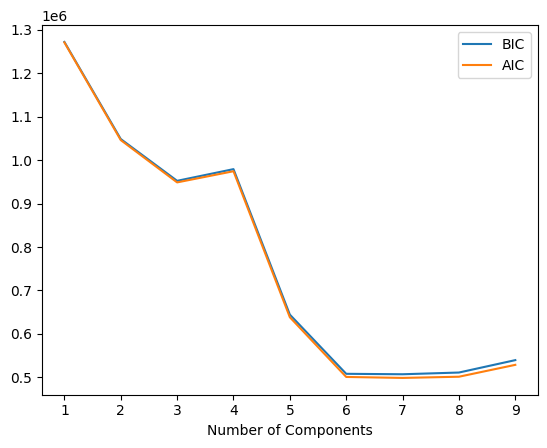

In [9]:
plt.plot(n_components,
         [m.bic(df_optimal) for m in models],
          label = 'BIC')
plt.plot(n_components,
         [m.aic(df_optimal) for m in models],
          label = 'AIC')
plt.legend()
plt.xlabel('Number of Components')

# 3. Create GMM model

In [10]:
df_optimal.shape

(8636, 17)

In [11]:
model = GaussianMixture(n_components = 6,
                        random_state = 1502).fit(df_optimal)

# 4 Interpret segments

In [12]:
cluster = pd.Series(model.predict(df_optimal))
cluster

0       1
1       3
2       5
3       5
4       5
       ..
8631    1
8632    1
8633    1
8634    3
8635    0
Length: 8636, dtype: int64

In [13]:
df_optimal['CLUSTER'] = cluster
df_optimal.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1.0
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3.0


In [14]:
df_optimal.CLUSTER.value_counts()

5.0    2499
3.0    1852
1.0    1613
4.0    1287
0.0     907
2.0     181
Name: CLUSTER, dtype: int64

In [15]:
df_optimal.shape

(8636, 18)

In [20]:
df_optimal.head(0)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER


In [21]:
interpretation = pd.DataFrame(model.means_,
             columns = df_optimal.iloc[:,:-1].columns)

interpretation = interpretation.round(2)

interpretation

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1443.07,0.89,1108.23,749.03,359.20,1912.20,0.56,0.28,0.37,0.27,6.16,15.44,4237.83,2567.71,652.75,0.14,10.71
1,161.87,0.64,678.05,357.19,320.86,0.00,0.52,0.14,0.38,0.00,0.00,9.01,3772.23,893.74,140.27,0.33,11.12
2,4374.26,0.93,7049.73,4396.43,2667.78,4021.66,0.67,0.36,0.57,0.25,12.75,61.52,9399.24,11024.73,5686.64,0.18,11.57
3,2181.71,0.90,0.00,0.00,0.00,1987.80,0.00,0.00,0.00,0.28,6.25,0.00,4038.60,1670.74,737.08,0.05,11.35
4,3266.59,1.00,956.40,552.59,403.81,1673.39,0.57,0.25,0.41,0.27,6.36,16.98,5320.96,1684.53,2045.80,0.00,12.00
5,1099.69,1.00,1585.50,917.51,667.99,0.00,0.77,0.34,0.60,0.00,0.00,25.61,4706.34,1552.14,545.84,0.22,12.00


In [22]:
import seaborn as sns

In [24]:
cmap = sns.light_palette("#34A853", as_cmap=True)
interpretation_heatmap = interpretation.style.background_gradient(cmap=cmap)
interpretation_heatmap

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1443.070000,0.890000,1108.230000,749.030000,359.200000,1912.200000,0.560000,0.280000,0.370000,0.270000,6.160000,15.440000,4237.830000,2567.710000,652.750000,0.140000,10.710000
1,161.870000,0.640000,678.050000,357.190000,320.860000,0.000000,0.520000,0.140000,0.380000,0.000000,0.000000,9.010000,3772.230000,893.740000,140.270000,0.330000,11.120000
2,4374.260000,0.930000,7049.730000,4396.430000,2667.780000,4021.660000,0.670000,0.360000,0.570000,0.250000,12.750000,61.520000,9399.240000,11024.730000,5686.640000,0.180000,11.570000
3,2181.710000,0.900000,0.000000,0.000000,0.000000,1987.800000,0.000000,0.000000,0.000000,0.280000,6.250000,0.000000,4038.600000,1670.740000,737.080000,0.050000,11.350000
4,3266.590000,1.000000,956.400000,552.590000,403.810000,1673.390000,0.570000,0.250000,0.410000,0.270000,6.360000,16.980000,5320.960000,1684.530000,2045.800000,0.000000,12.000000
5,1099.690000,1.000000,1585.500000,917.510000,667.990000,0.000000,0.770000,0.340000,0.600000,0.000000,0.000000,25.610000,4706.340000,1552.140000,545.840000,0.220000,12.000000


Cluster 0: middle ground in nearly all metrics,
Cluster 1:,
Cluster 2:High rollers (max in most, excepting % full payment and tenure),
Cluster 3:,
Cluster 4:,
Cluster 5:Active purchasers (highest purchases_frequency & 2nd one off),

What are we trying to identify? Most valuable customers, which should be offered new/different services?